In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Jamboree_Admission.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
df.rename(columns={'Serial No.':'Serial_No','GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score'},inplace=True)

In [11]:
df.rename(columns={'University Rating':'University_Rating','Chance of Admit ':'Chance_of_Admit'},inplace=True)

In [12]:
df.rename(columns={'LOR ':'LOR'},inplace=True)

In [13]:
df.columns

Index(['Serial_No', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [14]:
df['University_Rating'].unique()

array([4, 3, 2, 5, 1])

In [15]:
df['SOP'].nunique()

9

In [16]:
df['LOR'].nunique()

9

In [17]:
df['Research'].nunique()

2

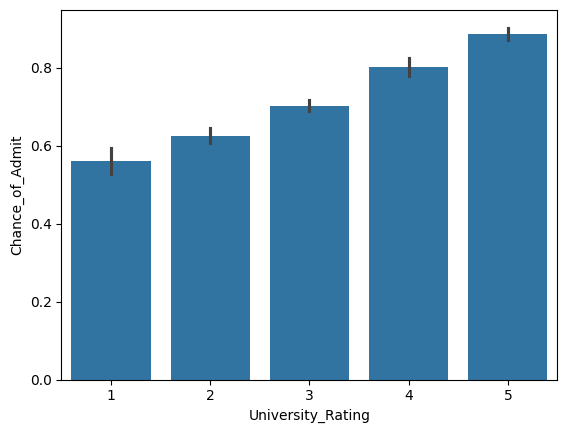

In [18]:
sns.barplot(data=df,x='University_Rating',y='Chance_of_Admit')
plt.show()

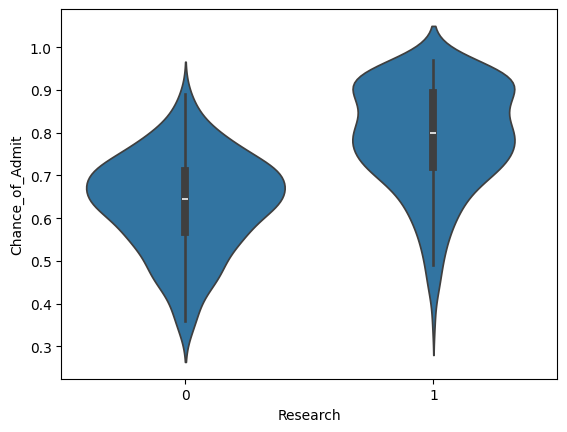

In [19]:
sns.violinplot(data=df,x='Research',y='Chance_of_Admit')
plt.show()

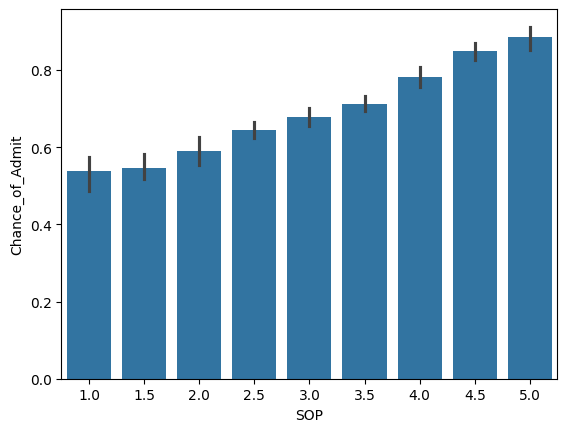

In [20]:
sns.barplot(data=df,x='SOP',y='Chance_of_Admit')
plt.show()

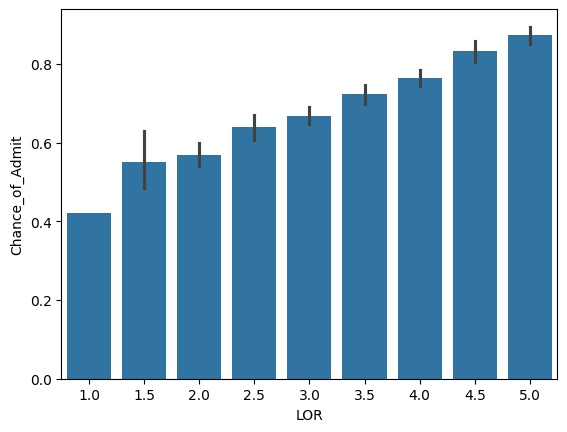

In [21]:
sns.barplot(data=df,x='LOR',y='Chance_of_Admit')
plt.show()

<Figure size 1200x800 with 0 Axes>

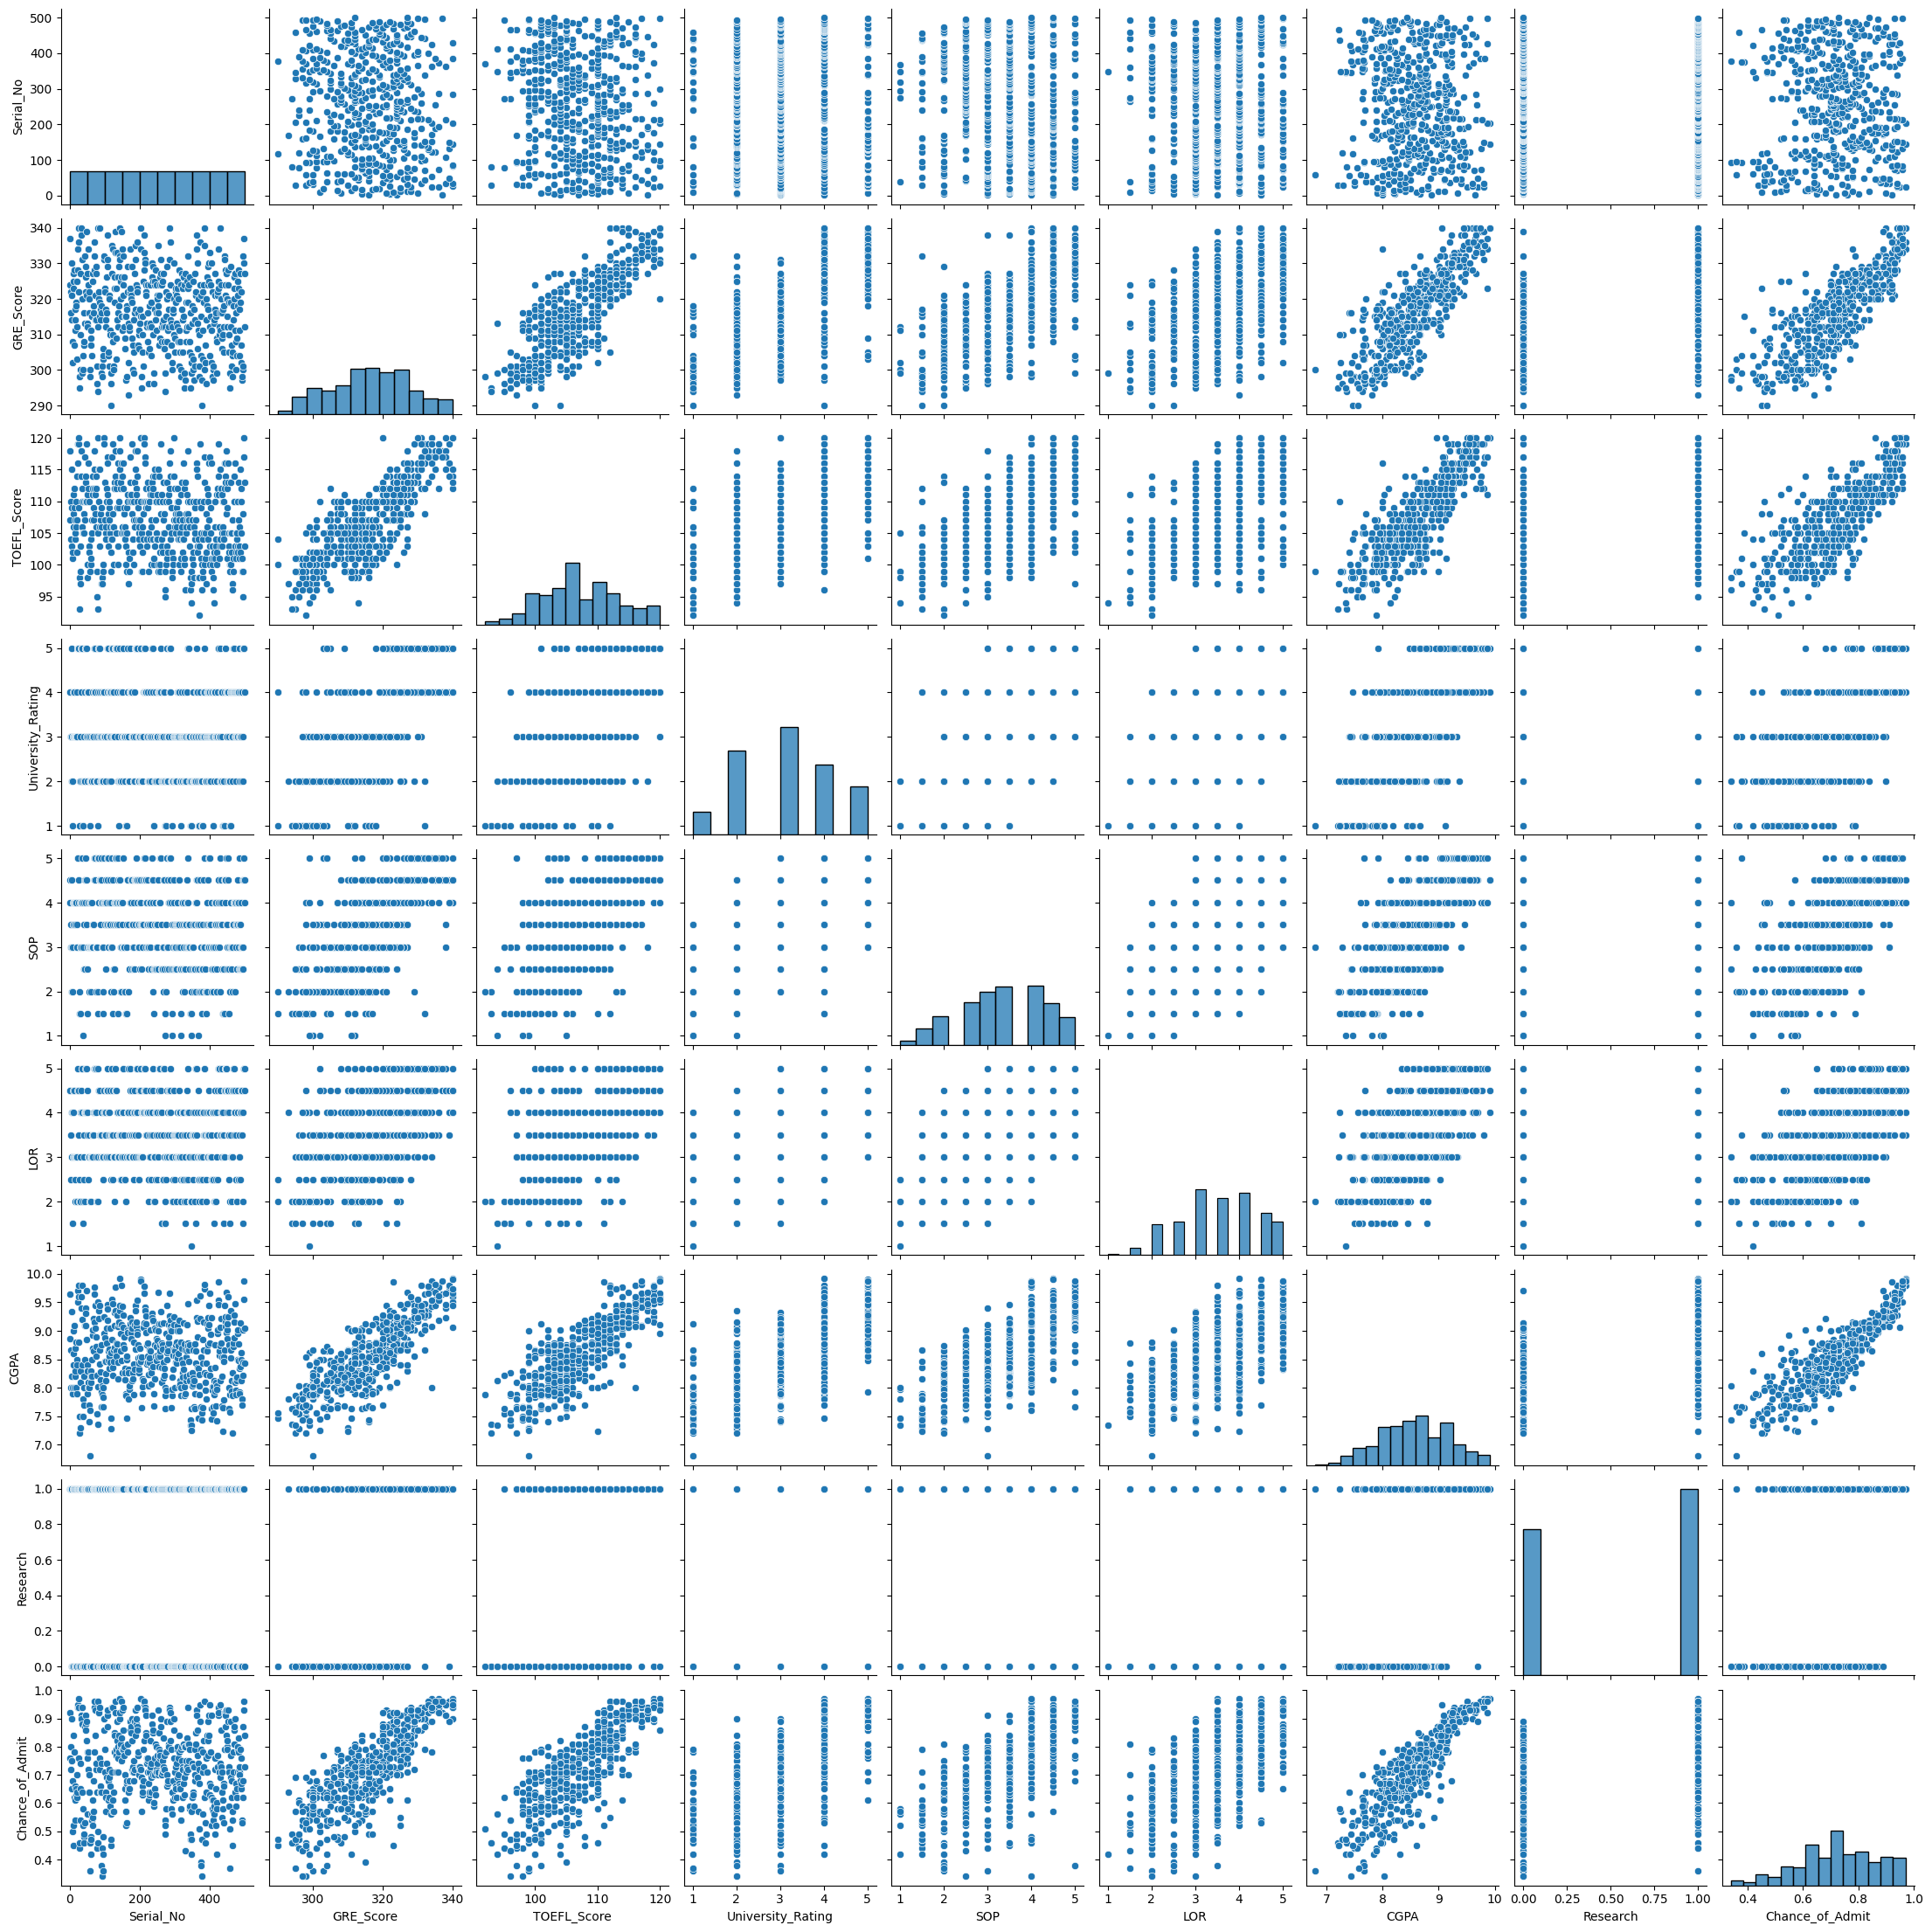

In [22]:
plt.figure(figsize=(12,8))
sns.pairplot(data=df)
plt.show()

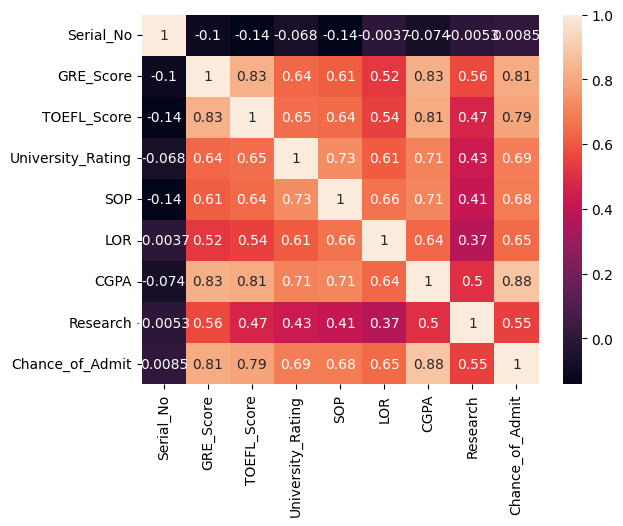

In [23]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [24]:
x = df.iloc[:,:-1]

In [25]:
x.drop(columns=['Serial_No'],inplace=True)

In [26]:
y = df['Chance_of_Admit']

In [27]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance_of_Admit, Length: 500, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [30]:
scaler = StandardScaler()

In [31]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [32]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [33]:
import statsmodels.api as sm
x_train_scaled = sm.add_constant(x_train_scaled)
x_test_scaled = sm.add_constant(x_test_scaled)

In [34]:
model = sm.OLS(y_train, x_train_scaled).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 12 Jun 2024   Prob (F-statistic):          3.41e-142
Time:                        18:21:10   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

In [35]:
x_train_new= x_train.drop(['University_Rating', 'SOP'], axis=1)
x_test_new = x_test.drop(['University_Rating', 'SOP'], axis=1)

In [36]:
x_train_new_scaled = scaler.fit_transform(x_train_new)
x_test_new_scaled = scaler.transform(x_test_new)

In [37]:
x_train_new_scaled = sm.add_constant(x_train_new_scaled)
x_test_new_scaled = sm.add_constant(x_test_new_scaled)

In [38]:
model_new = sm.OLS(y_train, x_train_new_scaled).fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Wed, 12 Jun 2024   Prob (F-statistic):          1.36e-144
Time:                        18:21:10   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.830      0.0

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(x):
    vif = pd.DataFrame()
    vif["Variable"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

x_train_new_scaled_df = pd.DataFrame(x_train_new_scaled, columns=['const','GRE_Score', 'TOEFL_Score','LOR', 'CGPA', 'Research'])
x_train_new_scaled_df = sm.add_constant(x_train_new_scaled_df)

vif = calculate_vif(x_train_new_scaled_df)
print("Initial VIF scores:\n", vif)

while vif['VIF'].max() > 5:
    drop_var = vif.sort_values('VIF', ascending=False).iloc[0]['Variable']
    x_train_scaled_df = x_train_scaled_df.drop(columns=[drop_var])
    vif = calculate_vif(x_train_scaled_df)
    print(f"Dropping {drop_var}, new VIF scores:\n", vif)

Initial VIF scores:
       Variable       VIF
0        const  1.000000
1    GRE_Score  4.471557
2  TOEFL_Score  3.540082
3          LOR  1.655867
4         CGPA  4.281365
5     Research  1.504670


In [43]:
x_train_scaled_final = x_train_new_scaled_df.values

In [44]:
import statsmodels.api as sm

model = sm.OLS(y_train, x_train_scaled_final).fit()
residuals = y_train - model.predict(x_train_scaled_final)

In [45]:
mean_residuals = residuals.mean()
print(f"Mean of residuals: {mean_residuals}")

Mean of residuals: -4.2063574845485617e-16


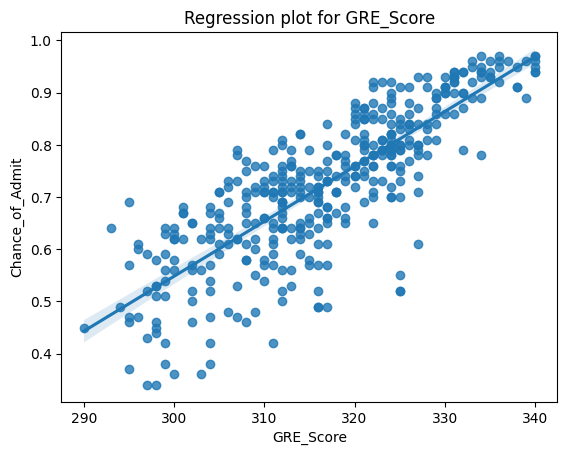

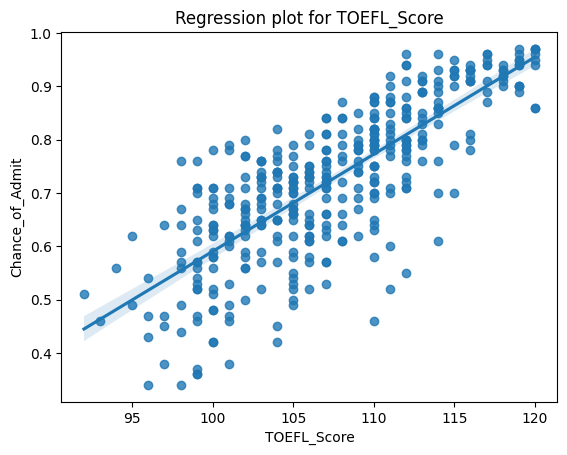

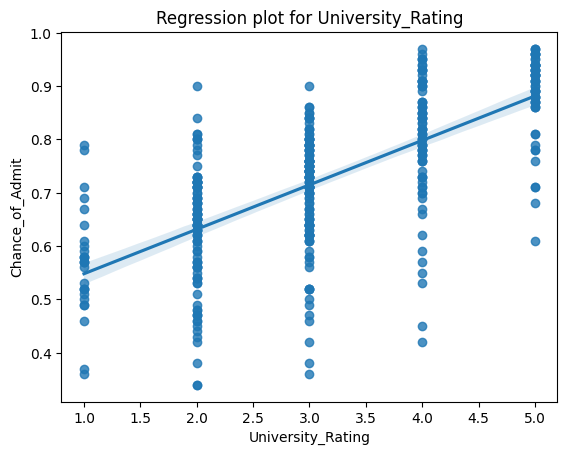

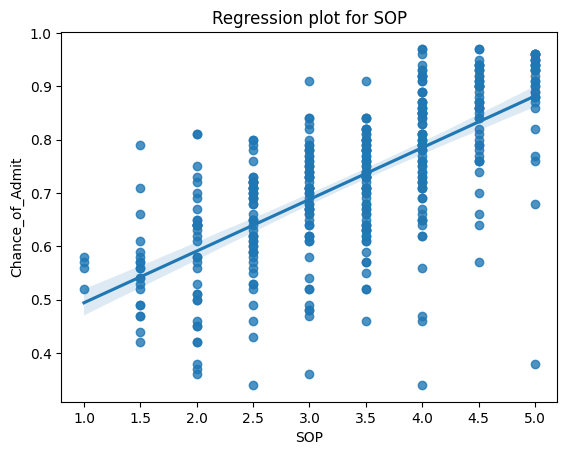

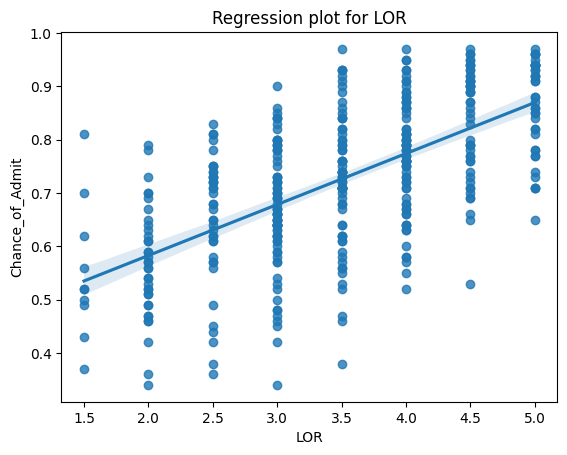

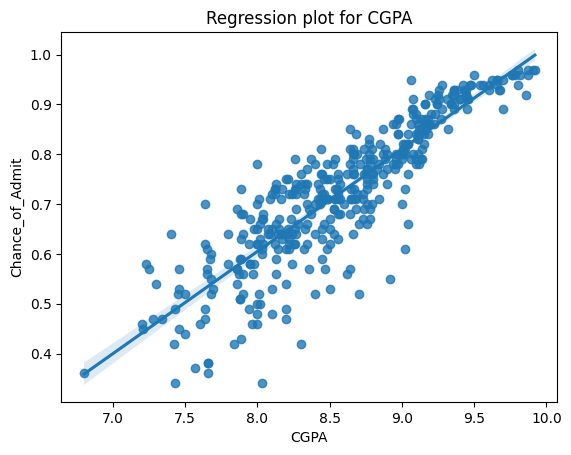

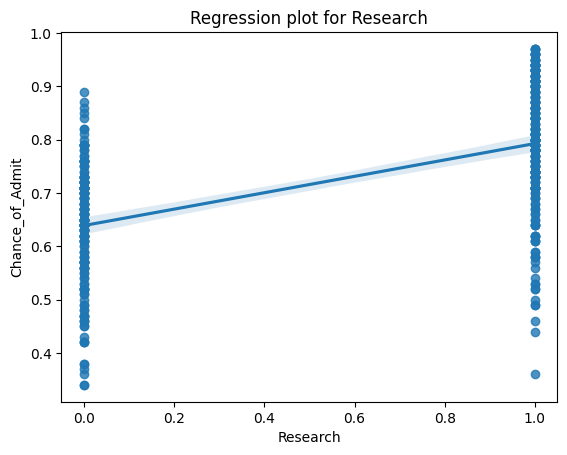

In [46]:
for column in x.columns:
    sns.regplot(x=x_train[column], y=y_train)
    plt.title(f'Regression plot for {column}')
    plt.show()

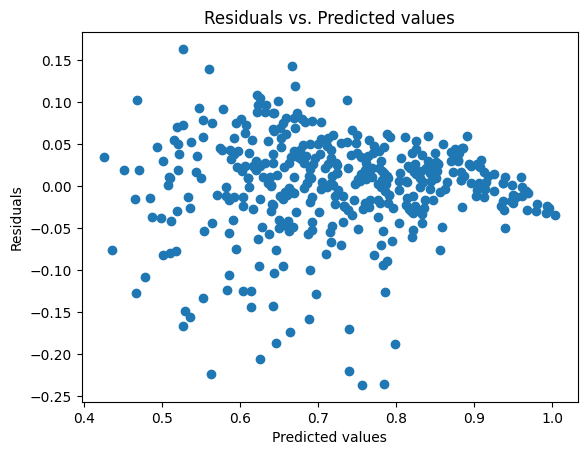

In [47]:
plt.scatter(model.predict(x_train_scaled_final), residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted values')
plt.show()

In [48]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

gq_test = het_goldfeldquandt(residuals, x_train_scaled_final)
print(f"Goldfeld-Quandt test p-value: {gq_test[1]}")

if gq_test[1] > 0.05:
    print("No strong evidence of heteroscedasticity (p-value > 0.05)")
else:
    print("Strong evidence of heteroscedasticity (p-value <= 0.05)")

Goldfeld-Quandt test p-value: 0.6139024845884404
No strong evidence of heteroscedasticity (p-value > 0.05)


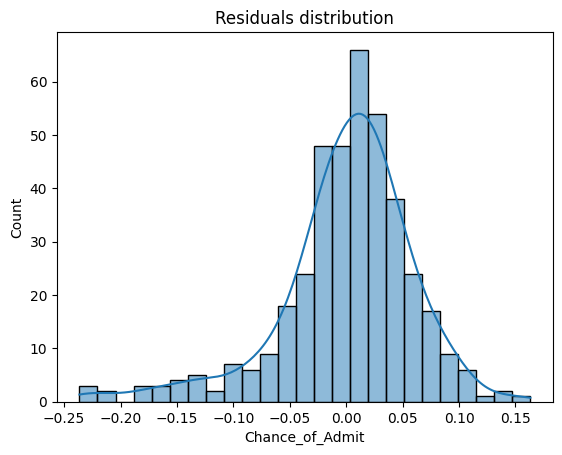

In [49]:
sns.histplot(residuals, kde=True)
plt.title('Residuals distribution')
plt.show()

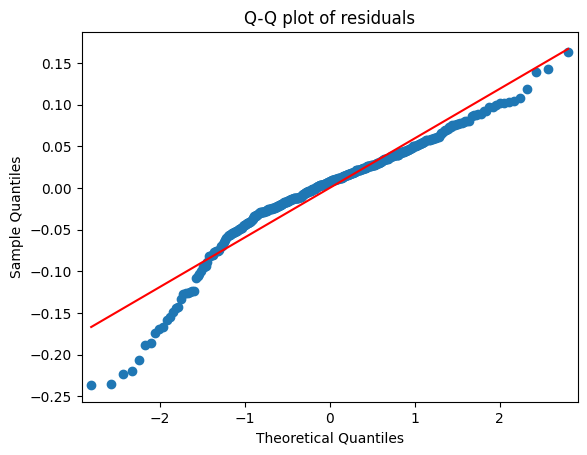

In [50]:
sm.qqplot(residuals, line='s')
plt.title('Q-Q plot of residuals')
plt.show()

In [52]:
x_test_scaled_df = pd.DataFrame(x_test_new_scaled, columns=['const','GRE_Score', 'TOEFL_Score','LOR', 'CGPA', 'Research'])
x_test_scaled_final = x_test_scaled_df.values

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred = model.predict(x_test_scaled_final)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 0.042923455782657785
Root Mean Square Error (RMSE): 0.06142491974041883
R-squared (R2) Score: 0.8155002070847485


In [56]:
n = x_test_scaled_final.shape[0]  # Number of samples
p = x_test_scaled_final.shape[1] - 1  # Number of features (excluding intercept)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R-squared Score: {adj_r2}")

Adjusted R-squared Score: 0.8056863883126606


Actionable Insights and Reccomendations:

1. Higher CGPA significantly increases the chances of admission.
2. Higher GRE score positively impacts the chance of admission.
3. Higher TOEFL score positively affects the chance of admission.
4. University Rating, SOP, LOR, and Research variables have smaller co-efficients indicating that they has less impact on admission.
5. Upon visualization, We can detect that higher SOP,LOR gradually increases the chances of admission.
6. Moreover, The students who have better University Rating are highly likely to be admitted.
7. Similarily, The students who have the Research Experience are given the most priority.
8. The model has a good performance with an R-squared value of 0.829.
9. The mean absolute error (MAE) and root mean square error (RMSE) are low, Which means the model is closer to the actual values.
10. The adjusted R-squared score also supports the model's goodness of fit.
11. Upon carrying out the Goldfeld-Quandt test, Since the p-value is greater than 0.05, We can say Homoscedasticity is present.

